In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

In [2]:
# !pip install seaborn

In [16]:
df = pd.read_csv("googleplaystore.csv")

In [21]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8886, dtype: object

In [20]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['Reviews'] = df['Reviews'].astype('int')

In [5]:
def size(s: str, default_val: int) -> int:
    x: int
    if s[-1] == 'k':
        x = int(float(s[:-1]) * 1_000)
    elif s[-1] == 'M':
        x = int(float(s[:-1]) * 1_000_000)
    else:
        x = default_val
    return x

df['Size'] = df['Size'].apply(lambda s: size(s, 9_400_000))

In [23]:
df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 8886, dtype: object

In [6]:
columns = ['Installs', 'Price']
for col in columns:
    df[col] = pd.to_numeric(df[col].replace(r'\D', '', regex=True))

In [25]:
df['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10834       June 18, 2017
10836       July 25, 2017
10837        July 6, 2018
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 8886, dtype: object

In [7]:
columns = ['Current Ver', 'Android Ver']
    
    
for col in columns:
    df[col] = pd.to_numeric(df[col].str.replace(r'[a-zA-Z]', '', regex=True)\
                                    .str.strip(), errors='ignore')\
                                    .replace('', np.nan)

In [8]:
last_date = pd.to_datetime(df['Last Updated'])
df['Last Updated days ago'] = last_date.apply(lambda x: date.today() - datetime.date(x))

df.drop("Last Updated", inplace=True, axis=1)

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated days ago
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3,1656 days
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,1648 days
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3,1450 days
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0,Teen,Art & Design,NaN,4.2,1504 days
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4,1492 days


### EDA on the dataset

- Given tasks
- Additional Information
    - Installs and Reviews
    - More about Rating
    - More about Content Rating

In [10]:
# What is the size of the market? numbers of download and $

df.groupby(['Category'])[['Price', 'Installs']].agg('sum')\
                    .sort_values(by=['Price', 'Installs'], ascending=[False, False])

,Price,Installs
Category,,
FINANCE,243987,770312400
FAMILY,228179,10041080590
LIFESTYLE,196088,534741120
MEDICAL,64886,42162676
GAME,28036,31543862717
TOOLS,20790,11450224500
PERSONALIZATION,12378,2074341930
SPORTS,9321,1528531465
PHOTOGRAPHY,7626,9721243130


In [33]:
# Same question but per category? (percentages please)

(df.groupby(['Category']).agg('sum')['Price']\
                    .transform(lambda x: x/x.sum())*100)\
                    .to_frame().sort_values(by='Price', ascending=False)

KeyError: 'Price'

In [12]:
# Depending on each category, what are the ratio of download per app?

(df.groupby(['Category']).agg('sum')['Installs']\
                .transform(lambda x: x/x.sum())*100)\
                .to_frame().sort_values(by='Installs', ascending=False)

,Installs
Category,
GAME,21.513381
COMMUNICATION,16.472186
SOCIAL,8.534625
PRODUCTIVITY,8.499998
TOOLS,7.809223
FAMILY,6.848166
PHOTOGRAPHY,6.630032
TRAVEL_AND_LOCAL,4.338882
VIDEO_PLAYERS,4.243426


Total number of apps' downloads: + 146624385338
Total amount of money spent on paid apps: $ 36729989768


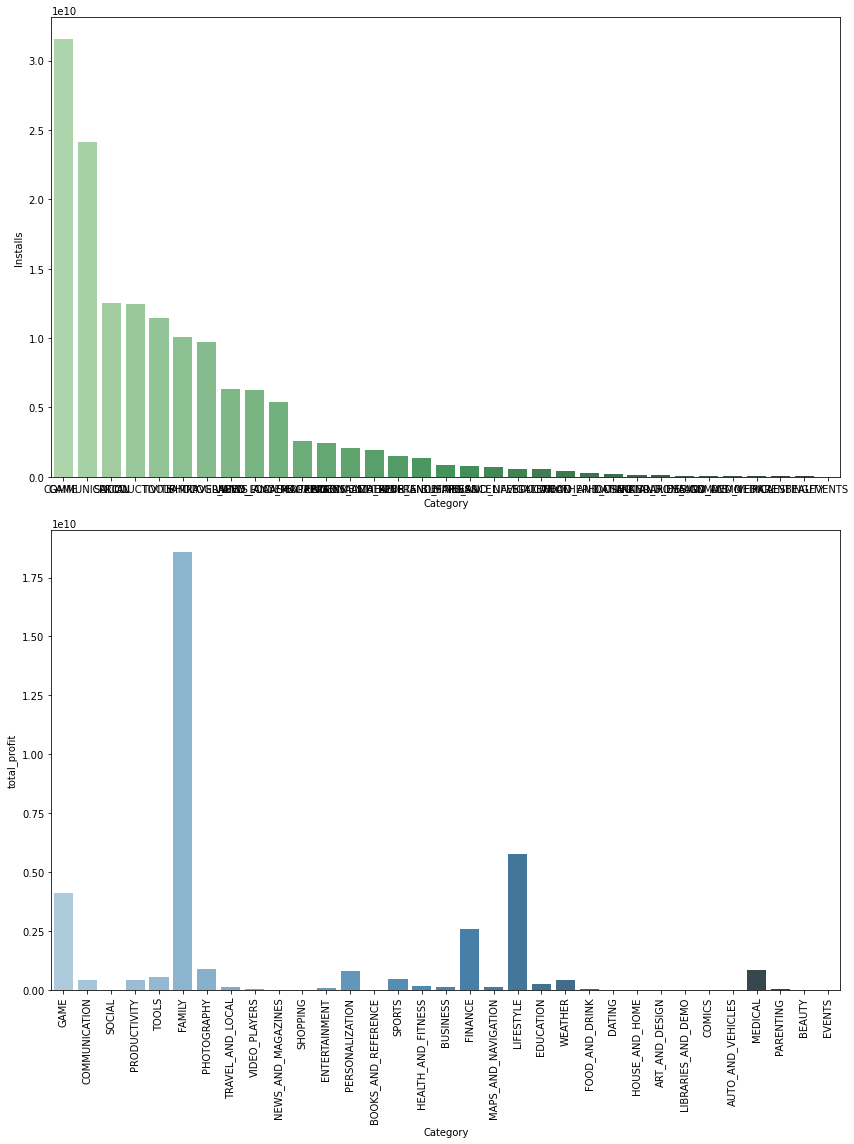

In [13]:
## TOTAL MARKET SIZE

total_installs = df["Installs"].sum()
print('Total number of apps\' downloads: +', total_installs)

df['total_profit'] = df['Installs'] * df['Price']
print('Total amount of money spent on paid apps: $', round(df['total_profit'].sum(),2), end='\n')

## TOTAL MARKET SIZE BY INSTALLS && TOTAL_PROFIT

total_cat = df.groupby('Category').sum().sort_values(by='Installs', ascending=False)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12,16))
_ = sns.barplot(x = total_cat.index, y = 'Installs', data = total_cat, palette="Greens_d", ax=axes[0])
_ = sns.barplot(x = total_cat.index, y = 'total_profit', data = total_cat, palette="Blues_d", ax=axes[1])
plt.xticks(rotation=90)
plt.tight_layout()

In [14]:
## Average price of applications in each category

fig = plt.figure(figsize=(16,8)) 
_ = df.groupby('Category').mean().sort_values(by='Price',ascending='False')['Price'].plot(kind='barh',title='Price in USD', fontsize=10)
plt.ylabel('App category') 
plt.xlabel('Average price - USD') 

ValueError: For argument "ascending" expected type bool, received type str.

<Figure size 1152x576 with 0 Axes>

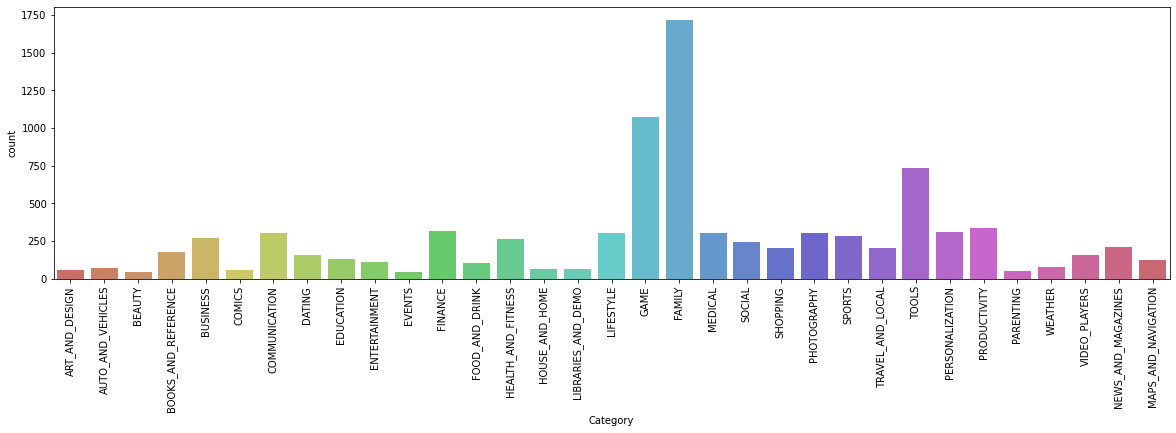

In [ ]:
## Countplot of each Category

plt.figure(figsize=(20,5))
fig = sns.countplot(x=df['Category'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

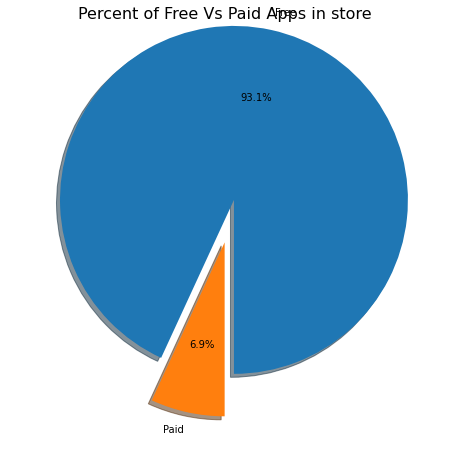

In [ ]:
## PIE CHART FOR FREE VS PAID APPS IN STORE

plt.figure(figsize=(8,8))
count = df['Type'].value_counts()
plt.pie(count, explode=(0.25,0), labels=['Free', 'Paid'], autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percent of Free Vs Paid Apps in store', size = 16)
plt.show()

In [ ]:
#What are the applications and categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?
cat_columns = ['Reviews', 'Content Rating', 'Rating', 'Installs', 'Price']

for col in cat_columns:
    if col == 'Content Rating':
        rating_cat, rating_count = df['Content Rating'].value_counts().index[0], df['Content Rating'].value_counts()[0]
        print(f"Maximum Content Rating is of : {rating_cat} with a value of {rating_count}", end = '\n')
    else: 
        app, count = df[df[col] == df[col].max()]["App"].iloc[0], df[col].max()
        print(f"Maximum {col} is of {app} with a value of {count}")

Maximum Reviews is of Facebook with a value of 78158306
Maximum Content Rating is of : Everyone with a value of 7089
Maximum Rating is of Hojiboy Tojiboyev Life Hacks with a value of 5.0
Maximum Installs is of Google Play Books with a value of 1000000000
Maximum Price is of I'm Rich - Trump Edition with a value of 40000


In [ ]:
# What is the average size of the applications

mean_val, max_val, min_val = df['Size'].describe()[['mean', 'max', 'min']]

# Converting to MB
print(f"Mean size {round(mean_val/(1024*1024))} Mb")
print(f"Heaviest app size {round(max_val/(1024*1024))} Mb")
print(f"Smalles app size {min_val/(1024*1024)} Mb")

Mean size 20 Mb
Heaviest app size 95 Mb
Smalles app size 0.008106231689453125 Mb


Text(0.5, 1.0, 'Distribution of App Ratings')

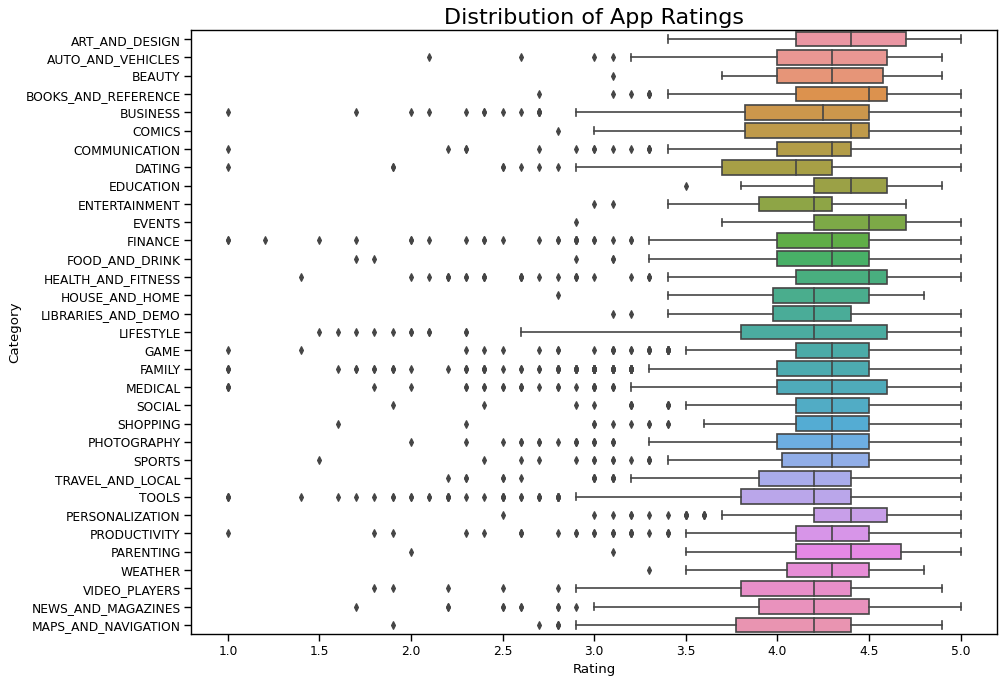

In [ ]:
plt.figure(figsize=(13,10), dpi= 80)
_ = sns.set_context("notebook")
ax = sns.boxplot(x='Rating', y='Category', data=df , notch=False)

ax.set_title('Distribution of App Ratings' , size = 20)

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

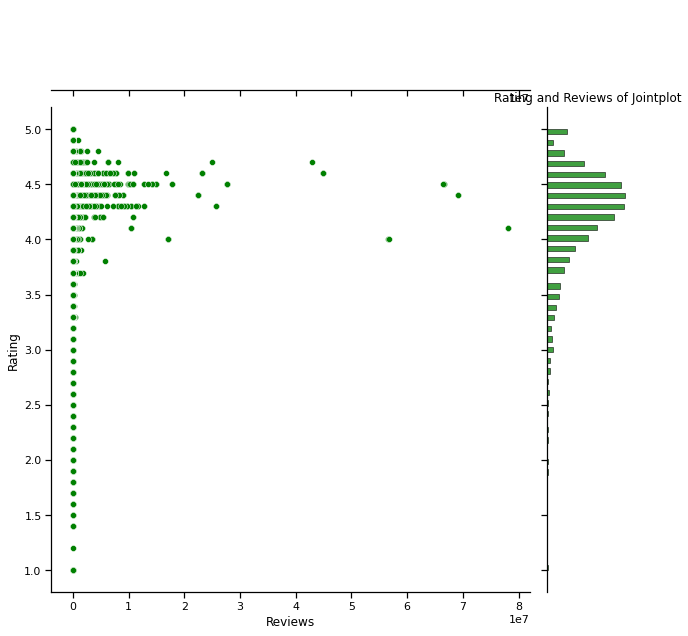

In [ ]:
plt.figure(figsize=(10,10))
_ = sns.jointplot(x='Reviews',y='Rating',data=df,color='green',size=9)
plt.title('Rating and Reviews of Jointplot')
plt.show()

Text(0.5, 1.0, 'Scatter plot Rating VS Price')

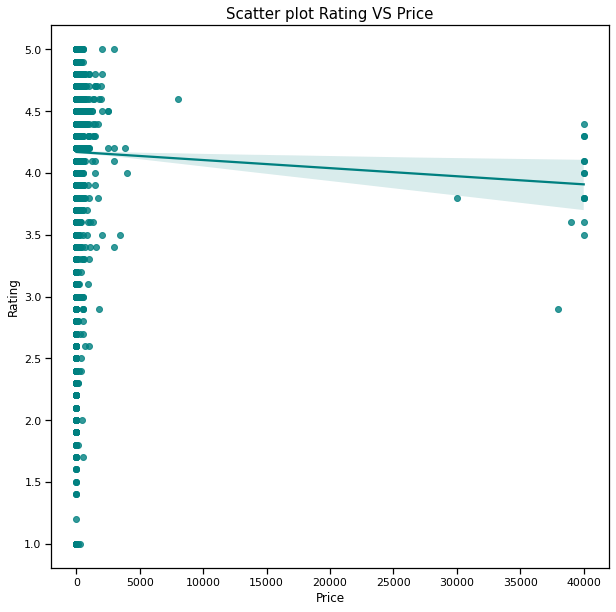

In [ ]:
plt.figure(figsize = (10,10))
_ = sns.regplot(x="Price", y="Rating", color='teal', data=df[df['Reviews']<1000000]);
plt.title('Scatter plot Rating VS Price',size = 15)

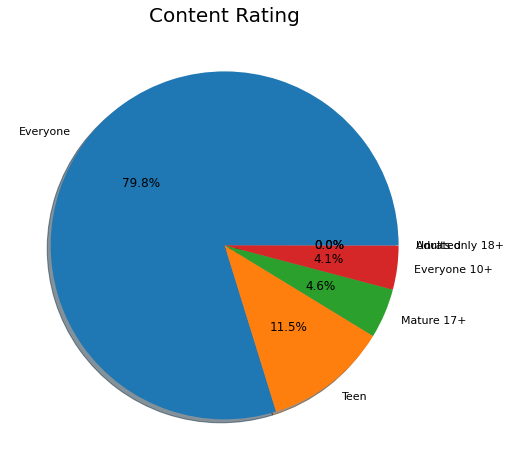

In [ ]:
## Content Rating for each of Categories

fig = plt.figure(figsize=(16,8)) 
labels = df['Content Rating'].value_counts(sort = True).index
sizes = df['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.show()

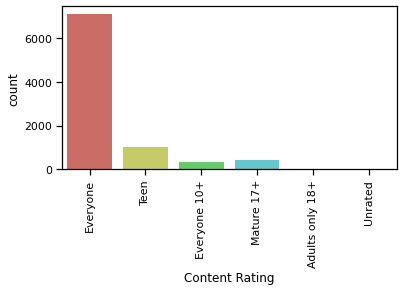

In [ ]:
## Count of Content Rating for each group

plt.figure(figsize=(6,3))
fig = sns.countplot(x=df['Content Rating'], palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

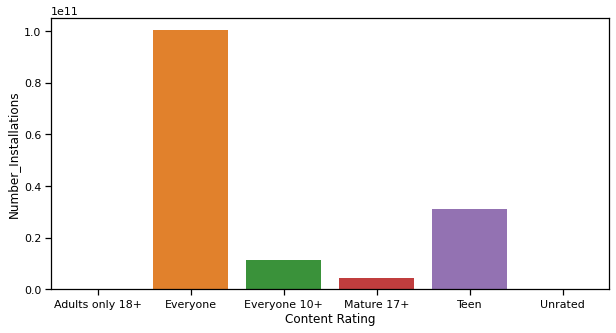

In [ ]:
data_cont =  df.groupby('Content Rating')['Installs'].agg('sum').reset_index(name='Number_Installations')
plt.figure(figsize=(10,5))
sns.barplot(x=data_cont['Content Rating'], y=data_cont['Number_Installations'])
plt.show()

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

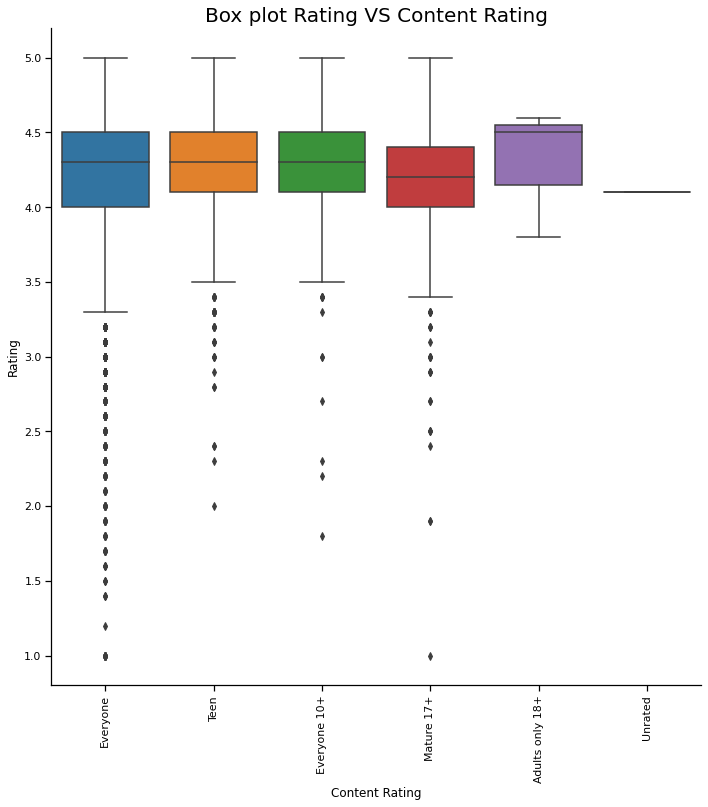

In [ ]:
_ = sns.catplot(x="Content Rating",y="Rating",data=df, kind="box", height = 10)
plt.xticks(rotation=90)
plt.ylabel("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

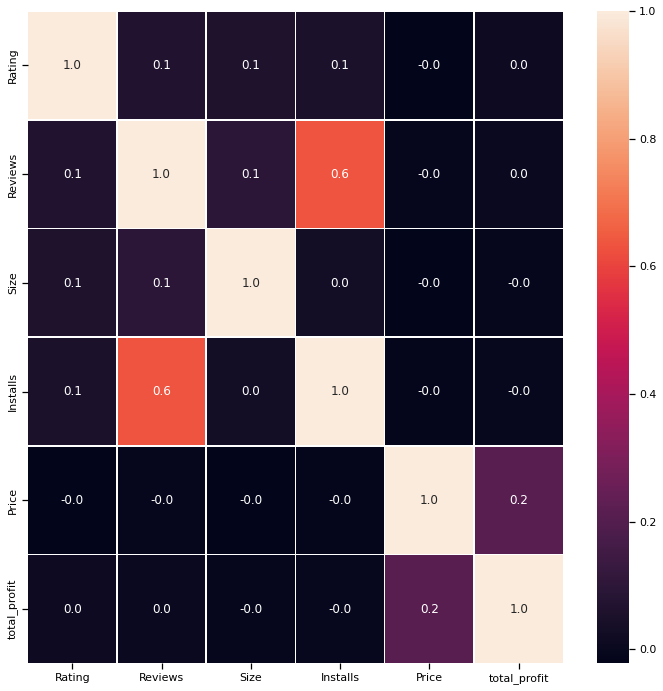

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()